In [1]:
using Images, FileIO, ImageView

Gtk-Message: 22:12:08.097: Failed to load module "canberra-gtk-module"


In [396]:
cutRow(from, to, img) = img[from:to,:]
cutCol(from, to, img) = img[:,from:to]
mostlyBg(pixels, bg, thresh=10) = sum(pixels .!= bg) < thresh

nextBgRow(img, bg, from=1) = findfirst(r -> mostlyBg(img[r,:], bg), from:height(img)) + from
nextNonBgRow(img, bg, from=1) = findfirst(r -> !mostlyBg(img[r,:], bg), from:height(img)) + from
nextBgCol(img, bg, from=1) = findfirst(c -> mostlyBg(img[:,c], bg), from:width(img)) + from
nextNonBgCol(img, bg, from=1) = findfirst(c -> !mostlyBg(img[:,c], bg), from:width(img)) + from

function cropVertical(img, bg)
    @show top = findfirst(r -> !mostlyBg(img[r,:], bg), 1:height(img))
    @show bottom = findlast(r -> !mostlyBg(img[r,:], bg), 1:height(img))
    img[top:bottom,:]
end
function cropHorizontal(img, bg)
    left = findfirst(c ->!mostlyBg(img(:,c), bg), 1:width(img))
    right = findlast(c ->!mostlyBg(img(:,c), bg), 1:width(img))
    img[:,left:right]
end
function nextColByBg(img, bg, from=1)
    @show left = nextNonBgCol(img, bg, from)
    @show right = nextBgCol(img, bg, left) - 1
    colimg = img[:,left:right]
    cropped = cropVertical(colimg, bg)
    #(cropVertical(img[:,left:right], bg), right + 1)
    cropped, right+1
end


firstFgPixel(pixels, bg) = findfirst(i -> pixels[i] != bg, 1:length(pixels))
lastFgPixel(pixels, bg) = findlast(i -> pixels[i] != bg, 1:length(pixels))

function nextRowByWidth(img, bg, from=1, thresh = 10)
    left = firstFgPixel(img[from,:], bg)
    right = lastFgPixel(img[from,:], bg)
    foundrow = findfirst(r -> abs(left - firstFgPixel(img[r,:], bg)) > thresh && abs(right - lastFgPixel(img[r,:], bg)) > thresh ,from:height(img))
    if foundrow == Nothing() bottom = height(img) else bottom = foundrow + from end
    img[from:bottom-1,:], bottom
end

nextRowByWidth (generic function with 3 methods)

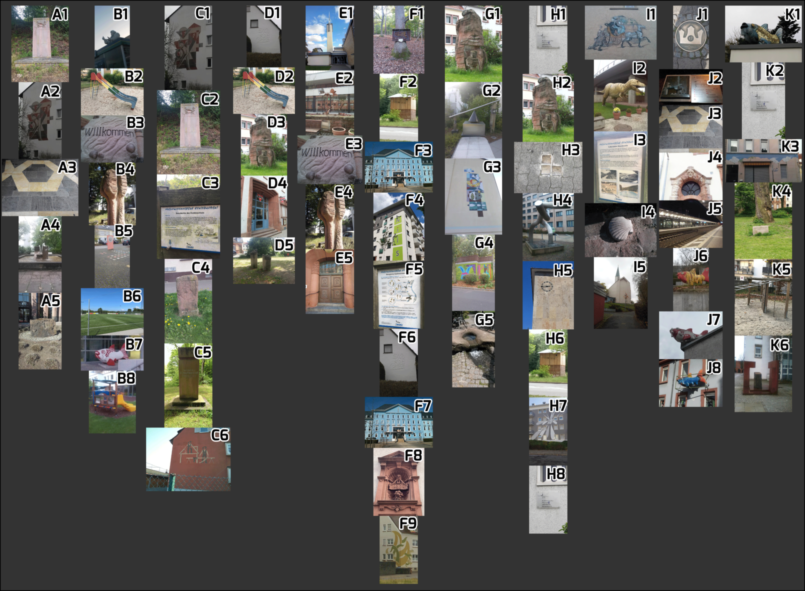

In [399]:
img = load("Portalsuche-November.png")

In [400]:
colA, right = nextColByBg(img, bg, 1)
colB, right = nextColByBg(img, bg, right)
colC, right = nextColByBg(img, bg, right)
colD, right = nextColByBg(img, bg, right)
colE, right = nextColByBg(img, bg, right)
colF, right = nextColByBg(img, bg, right)
colG, right = nextColByBg(img, bg, right)
colH, right = nextColByBg(img, bg, right)
colI, right = nextColByBg(img, bg, right)
colJ, right = nextColByBg(img, bg, right)
colK, right = nextColByBg(img, bg, right)

left = nextNonBgCol(img, bg, from) = 7
right = nextBgCol(img, bg, left) - 1 = 313
top = findfirst((r->begin
                #= In[396]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 20
bottom = findlast((r->begin
                #= In[396]:12 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 1479
left = nextNonBgCol(img, bg, from) = 322
right = nextBgCol(img, bg, left) - 1 = 578
top = findfirst((r->begin
                #= In[396]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 21
bottom = findlast((r->begin
                #= In[396]:12 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 1735
left = nextNonBgCol(img, bg, from) = 583
right = nextBgCol(img, bg, left) - 1 = 921
top = findfirst((r->begin
                #= In[396]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 21
bottom = findlast((r->begin
              

(RGB{Normed{UInt8,8}}[RGB{N0f8}(0.933,0.933,0.933) RGB{N0f8}(0.933,0.933,0.933) … RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2); RGB{N0f8}(0.867,0.867,0.867) RGB{N0f8}(0.933,0.933,0.933) … RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2); … ; RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2) … RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2); RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2) … RGB{N0f8}(0.2,0.2,0.2) RGB{N0f8}(0.2,0.2,0.2)], 3209)

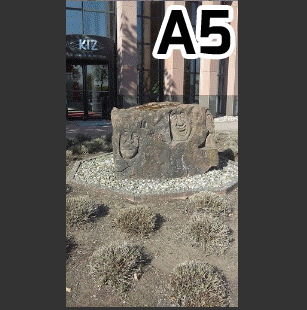

In [423]:
A1, offset = nextRowByWidth(colA, bg, 2)
A2, offset = nextRowByWidth(colA, bg, offset)
A3, offset = nextRowByWidth(colA, bg, offset)
A4_5, offset = nextRowByWidth(colA, bg, offset)
A4 = A4_5[1:305,:]
A5 = A4_5[305:height(A4_5),:]

A5

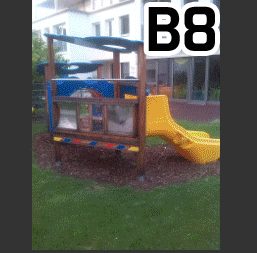

In [449]:
B1, offset = nextRowByWidth(colB, bg)
B2_3, offset = nextRowByWidth(colB, bg, offset+1)
B2 = B2_3[1:191,:]
B3 = B2_3[192:height(B2_3),:]
B4, offset = nextRowByWidth(colB, bg, offset)
B5, offset = nextRowByWidth(colB, bg, offset+2)
B6_7, offset = nextRowByWidth(colB, bg, offset+4)
B6 = B6_7[1:190,:]
B7 = B6_7[191:height(B6_7),:]
B8, offset = nextRowByWidth(colB, bg, offset)

B8

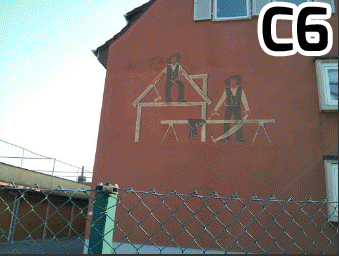

In [473]:
C1, offset = nextRowByWidth(colC, bg)
C2_3, offset = nextRowByWidth(colC, bg, offset)
C2 = C2_3[1:336,:]
C3 = C2_3[336:height(C2_3),:]
C4_5, offset = nextRowByWidth(colC, bg, offset)
C4 = C4_5[1:337,:]
C5 = C4_5[338:height(C4_5),:]
C6, offset = nextRowByWidth(colC, bg, offset)

C6

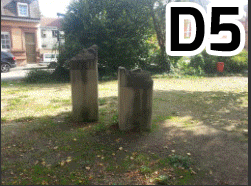

In [483]:
D1, offset = nextRowByWidth(colD, bg)
D2, offset = nextRowByWidth(colD, bg, offset)
D3_4, offset = nextRowByWidth(colD, bg, offset)
D3 = D3_4[1:245,:]
D4 = D3_4[246:height(D3_4),:]
D5, offset = nextRowByWidth(colD, bg, offset)
D5

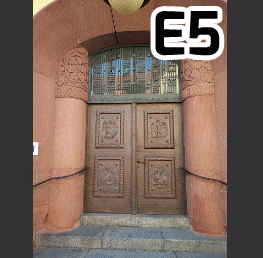

In [500]:
E1_2, offset = nextRowByWidth(colE, bg)
E1 = E1_2[1:259,:]
E2 = E1_2[260:height(E1_2),:]
E3, offset = nextRowByWidth(colE, bg, offset)
E4_5, offset = nextRowByWidth(colE, bg, offset)
E4 = E4_5[1:259,:]
E5 = E4_5[260:height(E4_5),:]

E5

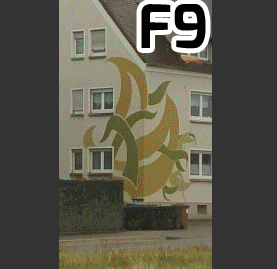

In [516]:
F1, offset = nextRowByWidth(colF, bg, 4)
F2, offset = nextRowByWidth(colF, bg, offset)
F3, offset = nextRowByWidth(colF, bg, offset)
F4_5, offset = nextRowByWidth(colF, bg, offset)
F4 = F4_5[1:272,:]
F5 = F4_5[273:height(F4_5),:]
F6, offset = nextRowByWidth(colF, bg, offset)
F7, offset = nextRowByWidth(colF, bg, offset)
F8, offset = nextRowByWidth(colF, bg, offset)
F9, offset = nextRowByWidth(colF, bg, offset)

F9

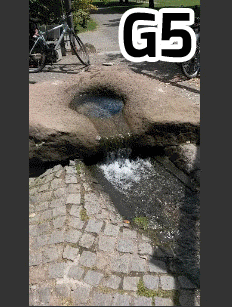

In [545]:
G1_23, offset = nextRowByWidth(colG, bg, 1)
G1 = G1_23[1:307,:]
G2 = G1_23[308:614,:]
G3 = G1_23[615:height(G1_23),:]
G4_5, offset = nextRowByWidth(colG, bg, offset)
G4 = G4_5[1:304,:]
G5 = G4_5[305:height(G4_5),:]

G5

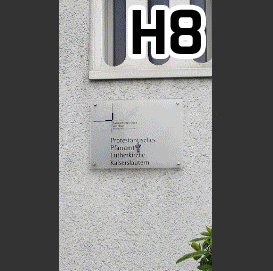

In [577]:
H1, offset = nextRowByWidth(colH, bg, 1)
H2, offset = nextRowByWidth(colH, bg, offset)
H3, offset = nextRowByWidth(colH, bg, offset)
H4_5, offset = nextRowByWidth(colH, bg, offset)
H4 = H4_5[1:272,:]
H5 = H4_5[273:height(H4_5),:]
H6_7, offset = nextRowByWidth(colH, bg, offset+1)
H6 = H6_7[1:271,:]
H7 = H6_7[272:543,:]
H8 = H6_7[544:height(H6_7),:]

H8

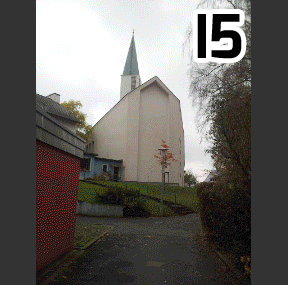

In [592]:
I1, offset = nextRowByWidth(colI, bg, 1)
I2_3, offset = nextRowByWidth(colI, bg, offset)
I2 = I2_3[1:286,:]
I3 = I2_3[287:height(I2_3),:]
I4, offset = nextRowByWidth(colI, bg, offset)
I5, offset = nextRowByWidth(colI, bg, offset)

I5

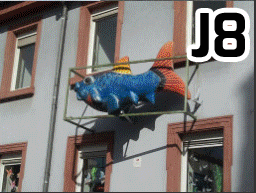

In [647]:
J1, offset = nextRowByWidth(colJ, bg, 1)
J2_3, offset = nextRowByWidth(colJ, bg, offset)
J2 = J2_3[1:143,:]
J3 = J2_3[144:333,:]
J4 = J2_3[334:524,:]
J5 = J2_3[525:height(J2_3),:]
J6_7, offset = nextRowByWidth(colJ, bg, offset)
J6 = J6_7[1:252,:]
J7 = J6_7[253:442,:]
J8 = J6_7[443:height(J6_7),:]

J8

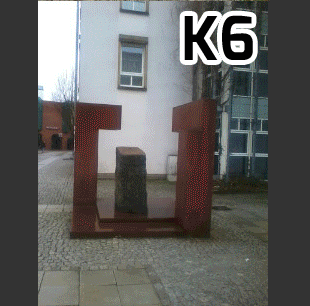

In [661]:
K1, offset = nextRowByWidth(colK, bg, 1)
K2, offset = nextRowByWidth(colK, bg, offset)
K3, offset = nextRowByWidth(colK, bg, offset+1)
K4_5, offset = nextRowByWidth(colK, bg, offset)
K4 = K4_5[1:305,:]
K5 = K4_5[306:610,:]
K6 = K4_5[611:height(K4_5),:]

K6

In [669]:
imgdir = "./november/"
save(imgdir * "A1.png", A1)
save(imgdir * "A2.png", A2)
save(imgdir * "A3.png", A3)
save(imgdir * "A4.png", A4)
save(imgdir * "A5.png", A5)

save(imgdir * "B1.png", B1)
save(imgdir * "B2.png", B2)
save(imgdir * "B3.png", B3)
save(imgdir * "B4.png", B4)
save(imgdir * "B5.png", B5)
save(imgdir * "B6.png", B6)
save(imgdir * "B7.png", B7)
save(imgdir * "B8.png", B8)

save(imgdir * "C1.png", C1)
save(imgdir * "C2.png", C2)
save(imgdir * "C3.png", C3)
save(imgdir * "C4.png", C4)
save(imgdir * "C5.png", C5)
save(imgdir * "C6.png", C6)

save(imgdir * "D1.png", D1)
save(imgdir * "D2.png", D2)
save(imgdir * "D3.png", D3)
save(imgdir * "D4.png", D4)
save(imgdir * "D5.png", D5)

save(imgdir * "E1.png", E1)
save(imgdir * "E2.png", E2)
save(imgdir * "E3.png", E3)
save(imgdir * "E4.png", E4)
save(imgdir * "E5.png", E5)

save(imgdir * "F1.png", F1)
save(imgdir * "F2.png", F2)
save(imgdir * "F3.png", F3)
save(imgdir * "F4.png", F4)
save(imgdir * "F5.png", F5)
save(imgdir * "F6.png", F6)
save(imgdir * "F7.png", F7)
save(imgdir * "F8.png", F8)
save(imgdir * "F9.png", F9)

save(imgdir * "G1.png", G1)
save(imgdir * "G2.png", G2)
save(imgdir * "G3.png", G3)
save(imgdir * "G4.png", G4)
save(imgdir * "G5.png", G5)

save(imgdir * "H1.png", H1)
save(imgdir * "H2.png", H2)
save(imgdir * "H3.png", H3)
save(imgdir * "H4.png", H4)
save(imgdir * "H5.png", H5)
save(imgdir * "H6.png", H6)
save(imgdir * "H7.png", H7)
save(imgdir * "H8.png", H8)

save(imgdir * "I1.png", I1)
save(imgdir * "I2.png", I2)
save(imgdir * "I3.png", I3)
save(imgdir * "I4.png", I4)
save(imgdir * "I5.png", I5)

save(imgdir * "J1.png", J1)
save(imgdir * "J2.png", J2)
save(imgdir * "J3.png", J3)
save(imgdir * "J4.png", J4)
save(imgdir * "J5.png", J5)
save(imgdir * "J6.png", J6)
save(imgdir * "J7.png", J7)
save(imgdir * "J8.png", J8)

save(imgdir * "K1.png", K1)
save(imgdir * "K2.png", K2)
save(imgdir * "K3.png", K3)
save(imgdir * "K4.png", K4)
save(imgdir * "K5.png", K5)
save(imgdir * "K6.png", K6)



0

bottom = 249
bottom = 630
bottom = 883
bottom = 1126
bottom = 1462


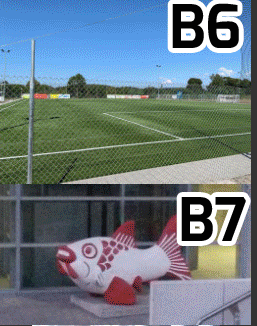

In [398]:
patch, bottom = nextRowByWidth(colB, bg, 2)
@show bottom

patch, bottom = nextRowByWidth(colB, bg, bottom + 10)
@show bottom

patch, bottom = nextRowByWidth(colB, bg, bottom)
@show bottom

patch, bottom = nextRowByWidth(colB, bg, bottom+10)
@show bottom

patch, bottom = nextRowByWidth(colB, bg, bottom+10)
@show bottom


patch

left = nextNonBgCol(img, bg, from) = 7
right = nextBgCol(img, bg, left) - 1 = 313
top = findfirst((r->begin
                #= In[336]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 20
bottom = findlast((r->begin
                #= In[336]:12 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 1479
left = nextNonBgCol(img, bg, from) = 322
right = nextBgCol(img, bg, left) - 1 = 578
top = findfirst((r->begin
                #= In[336]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 21
bottom = findlast((r->begin
                #= In[336]:12 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 1735
left = nextNonBgCol(img, bg, from) = 583
right = nextBgCol(img, bg, left) - 1 = 921
top = findfirst((r->begin
                #= In[336]:11 =#
                !(mostlyBg(img[r, :], bg))
            end), 1:height(img)) = 21
bottom = findlast((r->begin
              

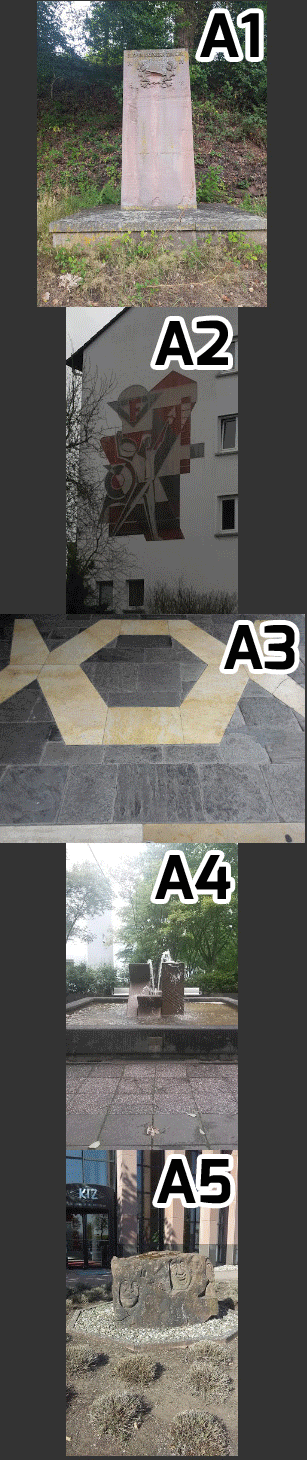

In [337]:
colA, right = nextColByBg(img, bg, 1)
colB, right = nextColByBg(img, bg, right)
colC, right = nextColByBg(img, bg, right)
colD, right = nextColByBg(img, bg, right)
colE, right = nextColByBg(img, bg, right)
colF, right = nextColByBg(img, bg, right)
colG, right = nextColByBg(img, bg, right)
colH, right = nextColByBg(img, bg, right)
colI, right = nextColByBg(img, bg, right)
colJ, right = nextColByBg(img, bg, right)
colK, right = nextColByBg(img, bg, right)

@show bottom
colA

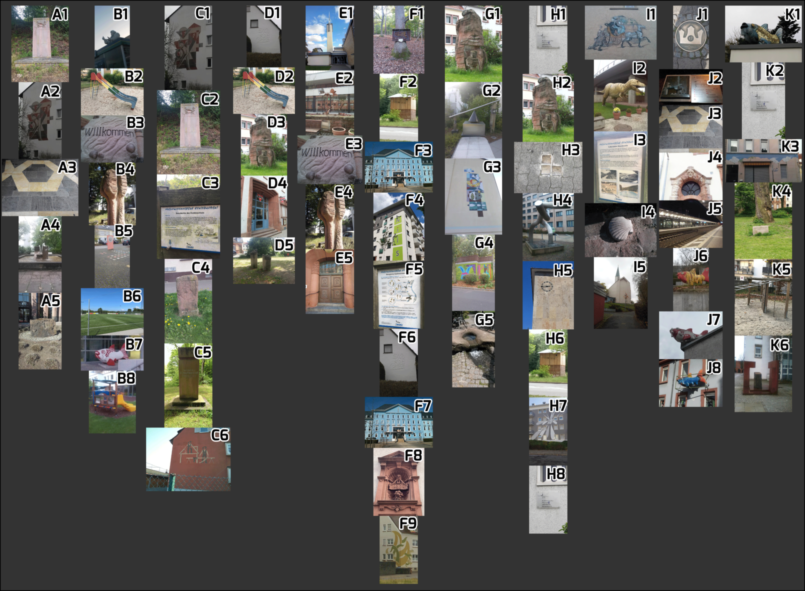

In [325]:
img = load("Portalsuche-November.png")

In [259]:
bg = img[1,1]

In [55]:
img[1,2] == bgrd
bgcols = findall(c -> !any(r -> img[r,c] != bgrd, 1:height(img)), 1:width(img));

In [165]:
function allBg(pixel)
    length(findall(pixel .!= bg)) < 10
end

c = 1
cr = 1
colimgs = [img[:,1:2]]
while c < width(img)
    if allBg(img[:,c])
        cr = c+1
        
        while !allBg(img[:,cr]) && cr<width(img)
            cr = cr+1
        end
        if cr - c > 3
            append!(colimgs, [img[:,c:cr]])
            #imshow(img[:,c:cr])
        end
        c = cr
    end
    c = c+1
end

In [171]:
colA = colimgs[2]
println(findfirst(r -> !allBg(colA[r,:]),1:height(colA)))
println(findlast(r -> !allBg(colA[r,:]),1:height(colA)))

20
1479


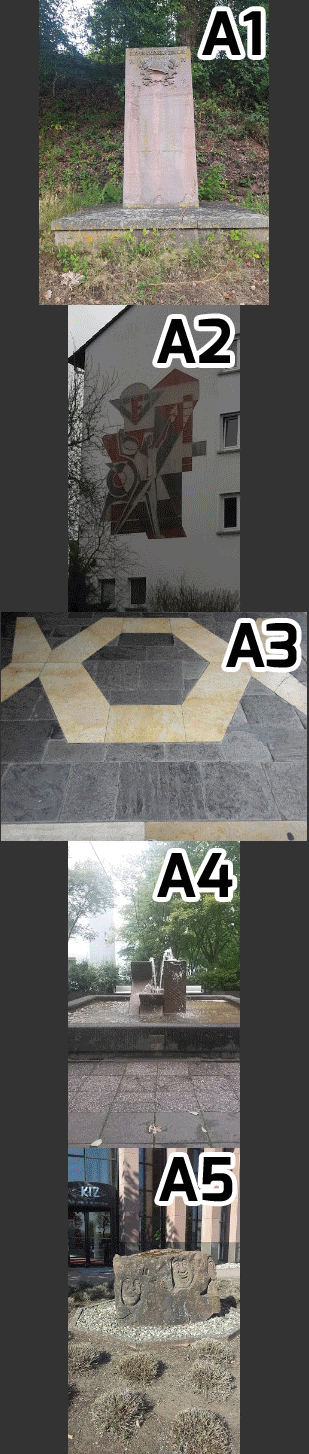

In [172]:
colA = colA[22:1475,:]

In [182]:
@show left = findfirst(px -> px != bg ,colA[1,:])
@show right = findlast(px -> px != bg ,colA[1,:])
findfirst(r -> findfirst(px -> px != bg ,colA[r,:]) - left > 10, 1:height(colA))

left = findfirst((px->begin
                #= In[182]:1 =#
                px != bg
            end), colA[1, :]) = 39
right = findlast((px->begin
                #= In[182]:2 =#
                px != bg
            end), colA[1, :]) = 269


307

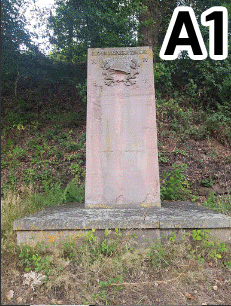

In [179]:
colA[1:306,39:269]

In [190]:
startrow = 307
@show left = findfirst(px -> px != bg, colA[startrow,:])
@show right = findlast(px -> px != bg, colA[startrow,:])
@show findfirst(r -> findfirst(px -> px != bg, colA[r,:]) - left > 10, startrow:height(colA))

left = findfirst((px->begin
                #= In[190]:2 =#
                px != bg
            end), colA[startrow, :]) = 69
right = findlast((px->begin
                #= In[190]:3 =#
                px != bg
            end), colA[startrow, :]) = 272
findfirst((r->begin
            #= In[190]:4 =#
            findfirst((px->begin
                                #= In[190]:4 =#
                                px != bg
                            end), colA[r, :]) - left > 10
        end), startrow:height(colA)) = nothing


In [28]:
img[1:height(img), 1]

In [27]:
any(p -> p != bgrd, img[1:height(img), 1])

true

In [13]:
[1, 2, 3] .== 1

3-element BitArray{1}:
 1
 0
 0